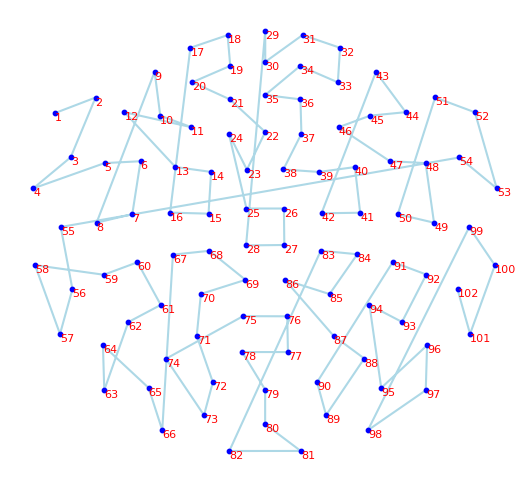

In [ ]:
# Plot of sensor/electrode locations
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("BCIsensor_xy.csv", header=None, names=["x", "y"])

plt.figure(figsize=(8, 6))
plt.plot(data["x"], data["y"], linestyle='-', color='lightblue', label='Line')
plt.scatter(data["x"], data["y"], color='blue', zorder=5, label='Points', s = 10)

for i, (x, y) in enumerate(zip(data["x"], data["y"]), start=1):
    plt.text(x, y, str(i),color='red',fontsize=8,ha='left',va='top',zorder=10)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()



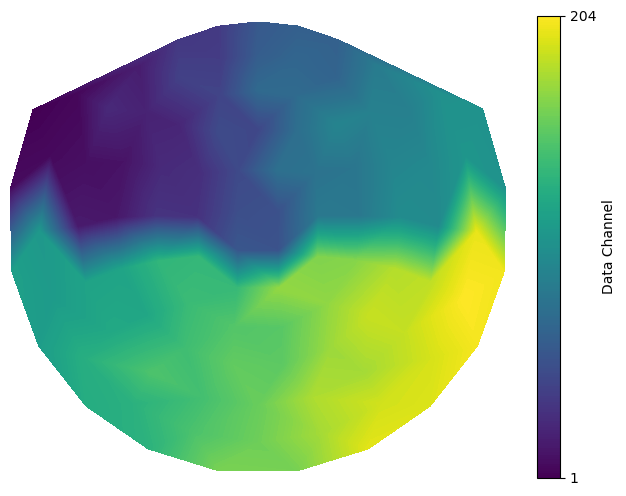

In [ ]:
# Code used to produce visualization of channel numbers on brain
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
data = pd.read_csv("BCIsensor_xy.csv", header=None, names=["x", "y"])

duplicated_data = data.loc[data.index.repeat(2)].reset_index(drop=True)
duplicated_data['Data Channel'] = np.arange(1, len(duplicated_data)+1)

x = duplicated_data['x']
y = duplicated_data['y']
z = duplicated_data['Data Channel']

triangulation = tri.Triangulation(x, y)

plt.figure(figsize=(8, 6))

contour = plt.tricontourf(triangulation, z,cmap='viridis',levels=204,vmin=1,vmax=204)
cbar = plt.colorbar(contour, ticks=[1, 204])
cbar.set_label('Data Channel')

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

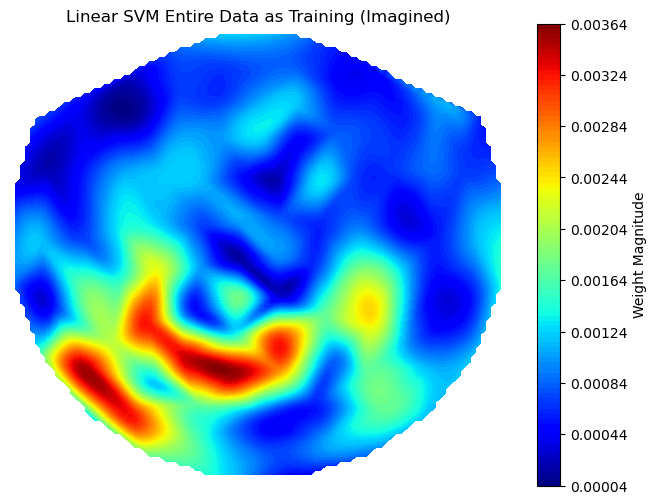

Training accuracy: 1.0
240
Sensor weights: [[ 7.77083533e-04  2.05686577e-04]
 [ 1.37635377e-04 -4.66485634e-04]
 [-1.09995823e-04 -1.50231209e-04]
 [ 4.84414003e-04  7.41301215e-05]
 [ 5.82427535e-04 -1.89463777e-05]
 [ 2.32727009e-04 -1.00840107e-03]
 [-4.16093676e-04  1.20164428e-03]
 [ 5.82846018e-05 -6.54638929e-04]
 [ 3.26764355e-04  7.77353858e-05]
 [-1.90358877e-04  1.86256914e-04]
 [ 5.94739193e-05  1.01020577e-03]
 [-6.40845658e-05  1.02589714e-04]
 [-4.79866612e-04 -1.10361560e-03]
 [ 5.49220024e-04 -1.00772046e-03]
 [ 7.13290275e-05  7.41090415e-04]
 [ 3.29098906e-04  1.21919626e-03]
 [ 8.21810176e-04  1.32542055e-04]
 [ 1.19283360e-03 -6.15646710e-06]
 [ 6.07673503e-04  3.08437223e-04]
 [ 2.20795764e-04  6.53665437e-04]
 [-3.51664128e-04  6.05660414e-04]
 [-7.48460886e-04 -1.02074228e-03]
 [-3.55526296e-05 -5.48999575e-04]
 [-6.96343236e-04  7.48061248e-04]
 [-8.66625854e-04  6.28407294e-04]
 [-5.98780270e-04  5.28926000e-04]
 [-3.42173903e-04 -8.82718687e-04]
 [ 1.2493327

In [ ]:
# Code for testing and training on entire data set for linear SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.svm import SVC

feaSubEImg_1 = pd.read_csv("feaSubEImg_1.csv", header=None)
feaSubEImg_2 = pd.read_csv("feaSubEImg_2.csv", header=None)

X_class1 = feaSubEImg_1.values.T  
X_class2 = feaSubEImg_2.values.T  

y_class1 = np.ones(X_class1.shape[0], dtype=int)
y_class2 = 2 * np.ones(X_class2.shape[0], dtype=int)

X_all = np.vstack([X_class1, X_class2])
y_all = np.concatenate([y_class1, y_class2])

SVM_model = SVC(kernel='linear', C=1.0)
SVM_model.fit(X_all, y_all)

weights = SVM_model.coef_.squeeze()  
sensor_weights = weights.reshape(-1, 2)
sensor_weight_magnitude = np.linalg.norm(sensor_weights, axis=1)

sensor_pos = pd.read_csv("BCIsensor_xy.csv", header=None, names=["x", "y"])
x_sensor = sensor_pos["x"].values
y_sensor = sensor_pos["y"].values

grid_x, grid_y = np.mgrid[x_sensor.min():x_sensor.max():100j, y_sensor.min():y_sensor.max():100j]
grid_z = griddata((x_sensor, y_sensor), sensor_weight_magnitude, (grid_x, grid_y), method='cubic')

plt.figure(figsize=(8, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='jet')
plt.colorbar(contour, label='Weight Magnitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title("Linear SVM Entire Data as Training (Imagined)")
plt.show()

accuracy = SVM_model.score(X_all, y_all)
print("Training accuracy:", accuracy)
decision_scores = SVM_model.decision_function(X_all)
print(len(decision_scores))
print("Sensor weights:", sensor_weights)
print(sensor_weight_magnitude)


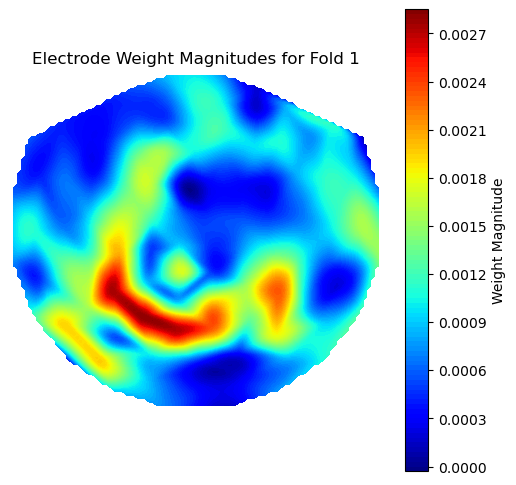

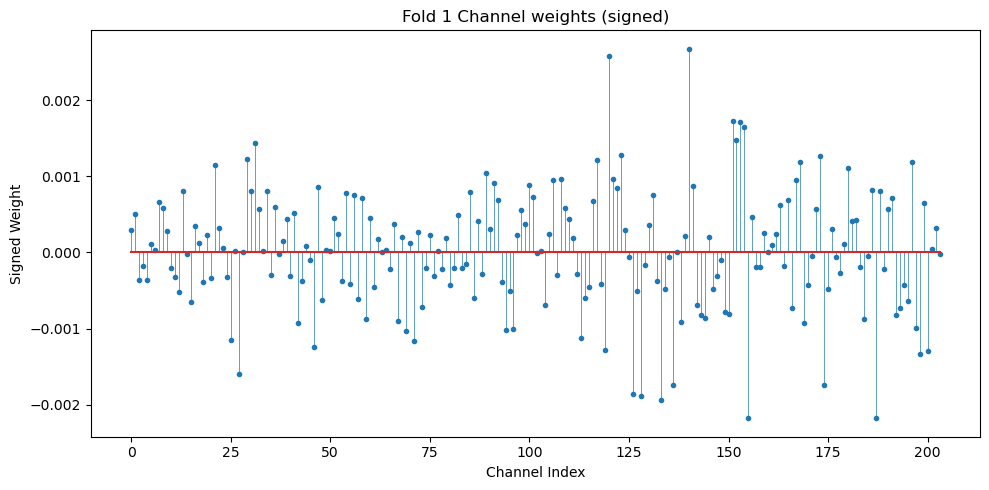


Top 6 channels in outer‐fold 1:
  Channel 140:  weight = +0.0027
  Channel 120:  weight = +0.0026
  Channel 155:  weight = -0.0022
  Channel 187:  weight = -0.0022
  Channel 133:  weight = -0.0019
  Channel 128:  weight = -0.0019


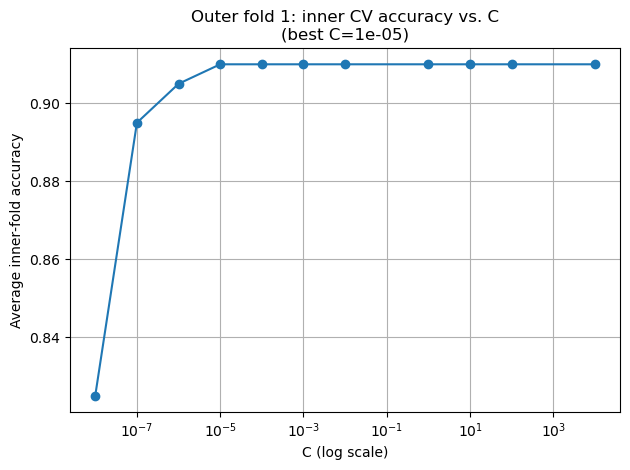

Fold 1: best C = 1e-05, test acc = 0.825


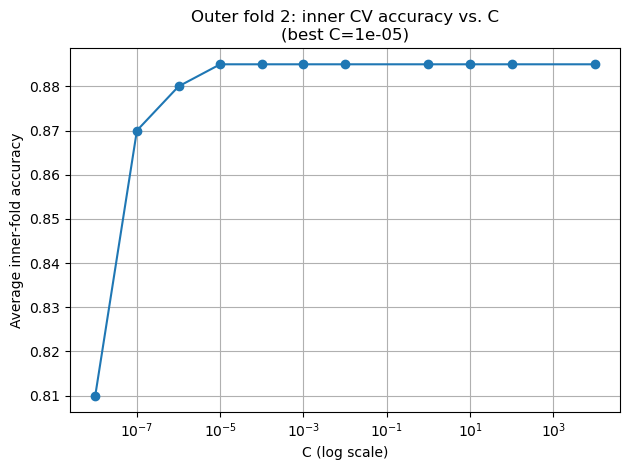

Fold 2: best C = 1e-05, test acc = 0.975


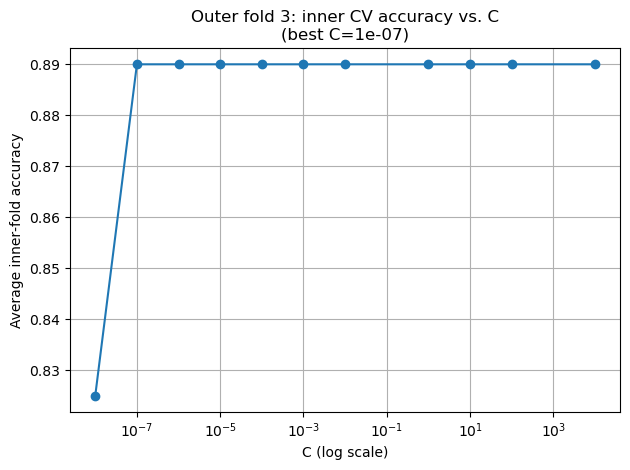

Fold 3: best C = 1e-07, test acc = 0.850


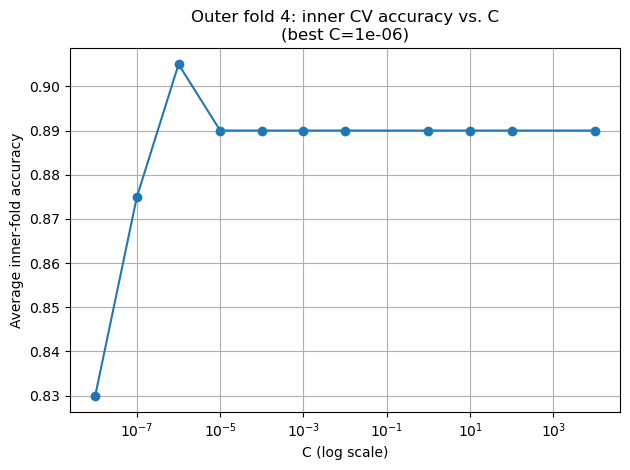

Fold 4: best C = 1e-06, test acc = 0.900


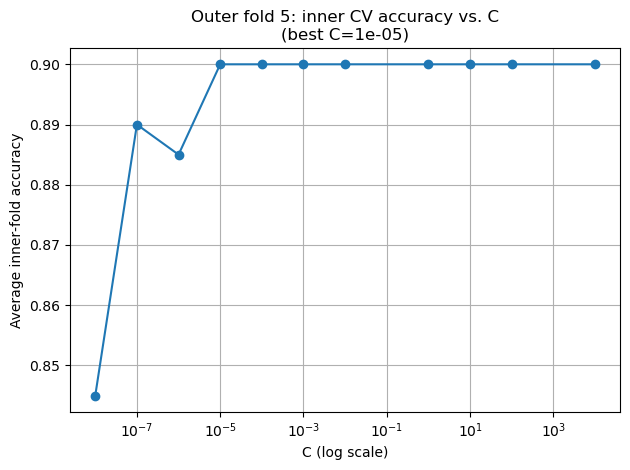

Fold 5: best C = 1e-05, test acc = 0.850


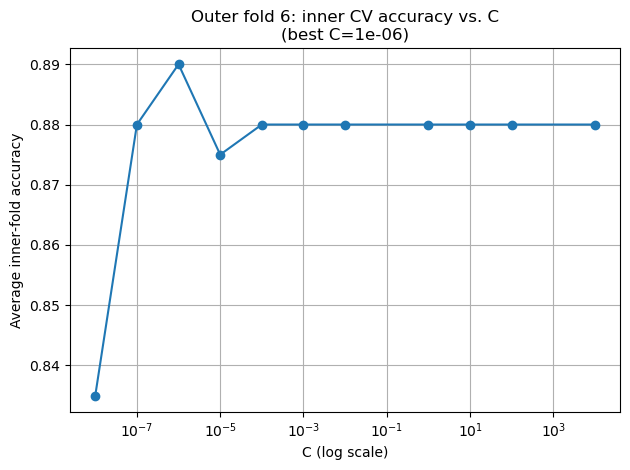

Fold 6: best C = 1e-06, test acc = 0.925

Chosen Cs per outer fold:  [1e-05, 1e-05, 1e-07, 1e-06, 1e-05, 1e-06]
Outer‐fold accuracies:     [0.825 0.975 0.85  0.9   0.85  0.925]
Mean nested-CV accuracy:   0.887


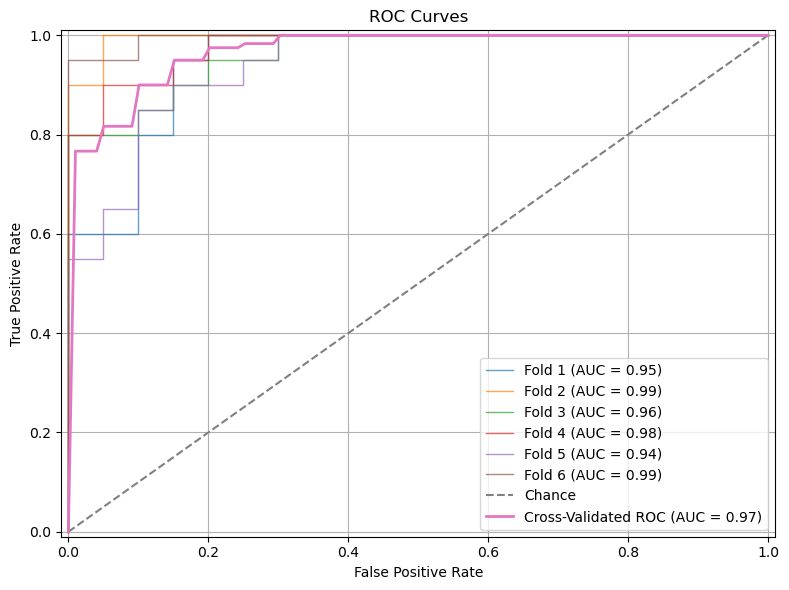

In [ ]:
# Code used for same training/testing simulations, reused for both overt and imagined by just changing the csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, PredefinedSplit, cross_val_score
from sklearn.metrics import roc_curve, auc

fea1 = pd.read_csv("feaSubEImg_1.csv", header=None).values.T  
fea2 = pd.read_csv("feaSubEImg_2.csv", header=None).values.T  
X = np.vstack([fea1, fea2])                                    
y = np.array([1]*fea1.shape[0] + [2]*fea2.shape[0])          

outer_cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=3426)
fold_ids = np.zeros(X.shape[0], dtype=int)
for outer_fold, (_, test_idx) in enumerate(outer_cv.split(X, y)):
    fold_ids[test_idx] = outer_fold

Cs = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1, 1e1, 1e2, 1e4]

chosen_Cs  = []
outer_accs = []

for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), start=1):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test,  y_test  = X[test_idx],  y[test_idx]

    inner_fold_ids = fold_ids[train_idx]
    ps = PredefinedSplit(test_fold=inner_fold_ids)

    avg_accs = []
    for C in Cs:
        scores = cross_val_score(SVC(kernel='linear', C=C),X_train, y_train,cv=ps)
        avg_accs.append(scores.mean())

    best_idx = np.argmax(avg_accs)
    best_C = Cs[best_idx]
    chosen_Cs.append(best_C)

    best_SVM = SVC(kernel='linear', C=best_C).fit(X_train, y_train)
    test_acc = best_SVM.score(X_test, y_test)
    outer_accs.append(test_acc)

    if fold_idx == 1:
        weights = best_SVM.coef_.squeeze() 

        sensor_weights = weights.reshape(-1, 2)            
        sensor_weight_magnitude = np.linalg.norm(sensor_weights, axis=1)

        sensor_pos = pd.read_csv("BCIsensor_xy.csv", header=None, names=["x","y"])
        x_sensor = sensor_pos["x"].values
        y_sensor = sensor_pos["y"].values

        grid_x, grid_y = np.mgrid[x_sensor.min():x_sensor.max():100j, y_sensor.min():y_sensor.max():100j]
        grid_z = griddata((x_sensor, y_sensor),sensor_weight_magnitude,(grid_x, grid_y),method = 'cubic')

        plt.figure(figsize=(6,6))
        plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='jet')
        plt.colorbar(label='Weight Magnitude')
        plt.gca().set_aspect('equal', 'box')
        plt.title("Electrode Weight Magnitudes for Fold 1")
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(10,5))
        markerline, stemlines, baseline = plt.stem(
        np.arange(len(weights)), weights,
        linefmt='C0-', markerfmt='C0o'
        )

        plt.setp(stemlines, linewidth=0.5)

        plt.setp(markerline, markersize=3)
        plt.xlabel("Channel Index")
        plt.ylabel("Signed Weight")
        plt.title("Fold 1 Channel weights (signed)")
        plt.tight_layout()
        plt.show()

        top6_idx = np.argsort(np.abs(weights))[::-1][:6]
        print("\nTop 6 channels in outer-fold 1:")
        for idx in top6_idx:
            print(f"  Channel {idx:3d}:  weight = {weights[idx]:+.4f}")

    plt.figure()
    plt.plot(Cs, avg_accs, marker='o', linestyle='-')
    plt.xscale('log')
    plt.xlabel("C (log scale)")
    plt.ylabel("Average inner-fold accuracy")
    plt.title(f"Outer fold {fold_idx}: inner CV accuracy vs. C\n(best C={best_C})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Fold {fold_idx}: best C = {best_C}, test acc = {test_acc:.3f}")

print("\nChosen Cs per outer fold: ", chosen_Cs)
print("Outer-fold accuracies:    ", np.round(outer_accs, 3))
print("Mean nested-CV accuracy:  ", np.mean(outer_accs).round(3))


mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs_fold = []

plt.figure(figsize=(8, 6))
for fold_idx, ((train_idx, test_idx), best_C) in enumerate(zip(outer_cv.split(X, y), chosen_Cs), start=1):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test,  y_test = X[test_idx],  y[test_idx]

    SVM_model = SVC(kernel='linear', C=best_C).fit(X_train, y_train)
    scores = SVM_model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, scores, pos_label=2)
    roc_auc = auc(fpr, tpr)
    aucs_fold.append(roc_auc)

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

    plt.plot(fpr, tpr, lw=1, alpha=0.7, label=f'Fold {fold_idx} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Chance')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, lw=2, label=f'Cross-Validated ROC (AUC = {mean_auc:.2f})')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


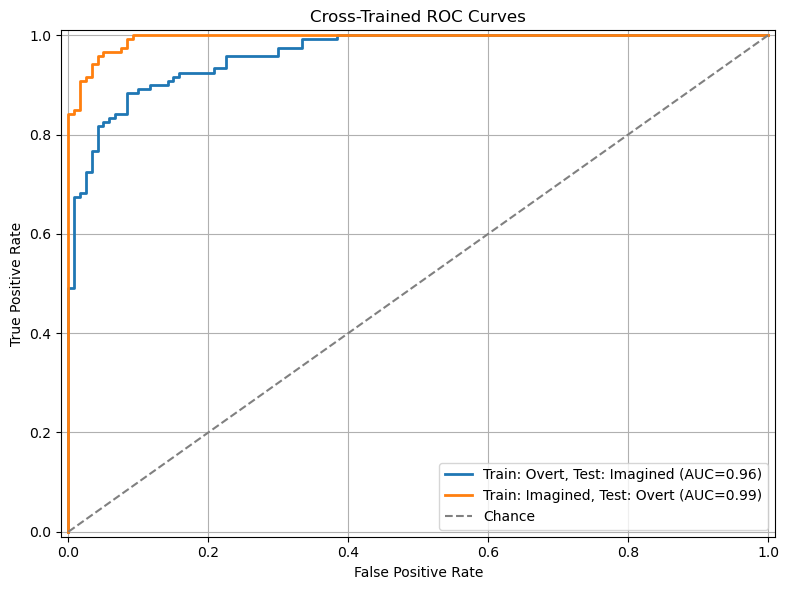

Training on overt, testing on imagined accuracy = 0.883
Training on imagined, testing on overt accuracy = 0.950


In [ ]:
# Code used for cross-training examples
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

fea_overt1 = pd.read_csv("feaSubEOvert_1.csv", header=None)
fea_overt2 = pd.read_csv("feaSubEOvert_2.csv", header=None)
X_overt1 = fea_overt1.values.T
X_overt2 = fea_overt2.values.T
X_overt = np.vstack([X_overt1, X_overt2])
y_overt = np.array([1]*X_overt1.shape[0] + [2]*X_overt2.shape[0])

fea_img1 = pd.read_csv("feaSubEImg_1.csv", header=None)
fea_img2 = pd.read_csv("feaSubEImg_2.csv", header=None)
X_img1 = fea_img1.values.T
X_img2 = fea_img2.values.T
X_img = np.vstack([X_img1, X_img2])
y_img = np.array([1]*X_img1.shape[0] + [2]*X_img2.shape[0])

train_overt_SVM = SVC(kernel='linear', C=1e-5)
train_overt_SVM.fit(X_overt, y_overt)

scores_img   = train_overt_SVM.decision_function(X_img)
fpr_img, tpr_img, _ = roc_curve(y_img, scores_img, pos_label=2)
auc_img = auc(fpr_img, tpr_img)
acc_img = train_overt_SVM.score(X_img, y_img)    

train_img_SVM = SVC(kernel='linear', C=1e-6)
train_img_SVM.fit(X_img, y_img)

scores_overt = train_img_SVM.decision_function(X_overt)
fpr_overt, tpr_overt, _ = roc_curve(y_overt, scores_overt, pos_label=2)
auc_overt = auc(fpr_overt, tpr_overt)
acc_overt = train_img_SVM.score(X_overt, y_overt) 

plt.figure(figsize=(8,6))
plt.plot(fpr_img, tpr_img, lw=2, label=f'Train: Overt, Test: Imagined (AUC={auc_img:.2f})')
plt.plot(fpr_overt, tpr_overt, lw=2, label=f'Train: Imagined, Test: Overt (AUC={auc_overt:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey', label='Chance')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Trained ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f'Training on overt, testing on imagined accuracy = {acc_img:.3f}' )
print(f'Training on imagined, testing on overt accuracy = {acc_overt:.3f}' )


In [ ]:
# Code used for testing different kernels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, PredefinedSplit, cross_val_score
from sklearn.metrics import roc_curve, auc

fea1 = pd.read_csv("feaSubEOvert_1.csv", header=None).values.T  
fea2 = pd.read_csv("feaSubEOvert_2.csv", header=None).values.T  
X = np.vstack([fea1, fea2])  
y = np.array([1]*fea1.shape[0] + [2]*fea2.shape[0])

outer_cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=3426)

fold_ids = np.zeros(X.shape[0], dtype=int)
for outer_fold, (_, test_idx) in enumerate(outer_cv.split(X, y)):
    fold_ids[test_idx] = outer_fold

Cs = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1, 1e1, 1e2, 1e4]

chosen_Cs  = []
outer_accs = []

for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), start=1):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test,  y_test  = X[test_idx],  y[test_idx]

    inner_fold_ids = fold_ids[train_idx]
    ps = PredefinedSplit(test_fold=inner_fold_ids)

    avg_accs = []
    for C in Cs:
        scores = cross_val_score( SVC(kernel='sigmoid', C=C),   X_train, y_train,cv=ps)
        avg_accs.append(scores.mean())

    best_idx = np.argmax(avg_accs)
    best_C   = Cs[best_idx]
    chosen_Cs.append(best_C)

    best_SVM = SVC(kernel='sigmoid', C=best_C).fit(X_train, y_train)  
    test_acc = best_SVM.score(X_test, y_test)
    outer_accs.append(test_acc)

print("\nChosen Cs per fold: ", chosen_Cs)
print("Outer-fold accuracies:    ", np.round(outer_accs, 3))
print("Mean nested-CV accuracy:  ", np.mean(outer_accs).round(3))


Chosen Cs per fold:  [1, 1, 1, 1, 1, 1]
Outer‐fold accuracies:     [0.925 0.875 0.9   0.925 0.95  0.975]
Mean nested‐CV accuracy:   0.925
